In [2]:
# Cosmic Web Analysis: Spectroscopic vs Photometric Comparison
# Team:Jenna Shuffelton, Valeria Lopez, Celine Mayer  
# Question: Does the spectroscopic sample miss cosmic structures due to selection bias?
# We want: Compare SDSS spectroscopic and photometric galaxy samples to investigate 
# whether selection bias causes us to miss large-scale structures (filaments, voids, clusters)

In [28]:
## Our Sky Region (values in the proposal!)

#RA:180 to 185 (5 degree width) -- degrees
#Dec: 30 to 35 (5 degree height) -- degrees
#Redshift 0.02 < z < 0.30

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dl import queryClient as qc
from astropy.cosmology import Planck18 as cosmo

In [30]:
#region parameters
ra_min = 180.0
ra_max = 185.0
dec_min = 30.0
dec_max = 35.0
z_min = 0.02
z_max = 0.30

print(f"RA range:  {ra_min} to {ra_max} degrees (width: {ra_max - ra_min} degrees)")
print(f"Dec range: {dec_min} to {dec_max} degrees (height: {dec_max - dec_min} degrees)")
print(f"Redshift:  {z_min} to {z_max}\n")
print(f"Sky area: {(ra_max - ra_min) * (dec_max - dec_min)} square degrees")

RA range:  180.0 to 185.0 degrees (width: 5.0 degrees)
Dec range: 30.0 to 35.0 degrees (height: 5.0 degrees)
Redshift:  0.02 to 0.3

Sky area: 25.0 square degrees


In [44]:
#Spectroscopic Data Collection
#Jenna, I think you wanted to work on this?
## Query SDSS DR17 specObj table to get galaxies w their accurate spectroscopic redshifts
##git has the examples for this 

## i did some research and for this section we need this -- feel free to delete or add if i missed something:

#1. Query SDSS spectroscopic catalog
#2. Filter for galaxies in our sky region
#3. Remove bad redshifts 
#4. Save data to CSV
#5. Create basic plots

In [45]:
# Spectroscopic query
query_spec = f"""
SELECT 
    s.ra, 
    s.dec, 
    s.z, 
    s.zerr,
    s.class,
    s.specobjid
FROM sdss_dr17.specobj AS s
WHERE 
    s.ra BETWEEN {ra_min} AND {ra_max}
    AND s.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
"""
print("Spectroscopic query ready.")
print("Run with: spec_data = qc.query(sql=query_spec, fmt='pandas')")

Spectroscopic query ready.
Run with: spec_data = qc.query(sql=query_spec, fmt='pandas')


In [46]:
# like in the git, test query with limit 100
spec_data_test = qc.query(sql=query_spec, fmt='pandas')
print("Galaxies retrieved", len(spec_data_test))
print("First 5 entries")
print(spec_data_test.head())

Galaxies retrieved 2415
First 5 entries
          ra        dec         z      zerr   class            specobjid
0  180.40698  30.003892  0.164183  0.000035  GALAXY  2505266993263831040
1  180.49896  30.004638  0.071869  0.000020  GALAXY  2508591093285677056
2  180.75047  30.007559  0.127590  0.000024  GALAXY  2505277988380108800
3  181.10918  30.004950  0.079258  0.000033  GALAXY  2508579548413585408
4  180.07069  30.035298  0.151829  0.000019  GALAXY  2505264519362668544


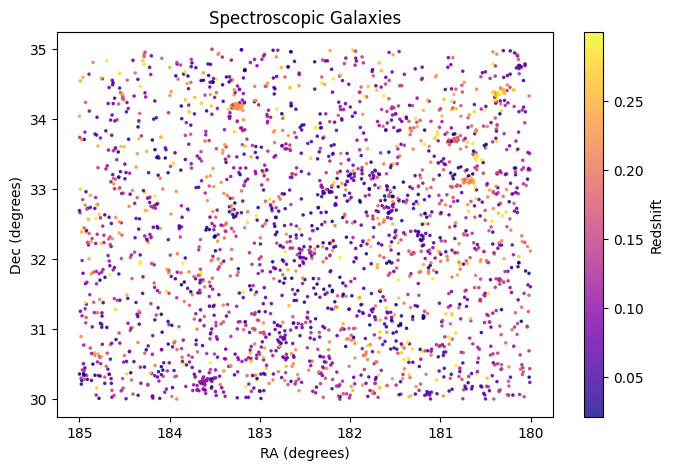

In [47]:
# Simple visualization of test data

plt.figure(figsize=(8, 5))
plt.scatter(spec_data_test['ra'],spec_data_test['dec'],c=spec_data_test['z'], s=2.5, alpha=0.8, cmap='plasma')

plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Spectroscopic Galaxies')
plt.colorbar(label='Redshift')
plt.gca().invert_xaxis()
plt.show()